# Time Series Analysis  
Lund University

## Example Code 1: Examining Realisations, Spectra, and ACF 

**Reference:**  
*An Introduction to Time Series Modeling*, 4th ed, by Andreas Jakobsson  
Studentlitteratur, 2021

Lets have fun!

In [1]:
# Import Required Libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftshift
from scipy.signal.windows import hamming, blackman
import scipy.stats as stats

# Import tsa_lth package
import sys
import os
sys.path.append(os.path.join(os.getcwd(), '..', 'TimeSeriesAnalysis-main', 'TimeSeriesAnalysis-main'))
from tsa_lth.analysis import acf
from tsa_lth.tools.pyulear import pyulear

# Configure matplotlib 
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 10
plt.rcParams['lines.linewidth'] = 1.0

### Simulated Variables

Let's simulate some signals.


In [2]:
# Simulate some processes.
np.random.seed(0)  # For reproducibility
N  = 100                                       # How does the ACF estimate change if you increase N to 1000?
w0 = 2*np.pi*0.1                               # Periodicity of 1/0.1 = 10 samples.
x  = 2 * np.sin( w0*np.arange(1,N+1) + np.random.rand()*2*np.pi )    # Try reducing the amplitude to 1. Can you see the periodicity in the realisation?
w  = np.random.randn(N)
y  = x + w

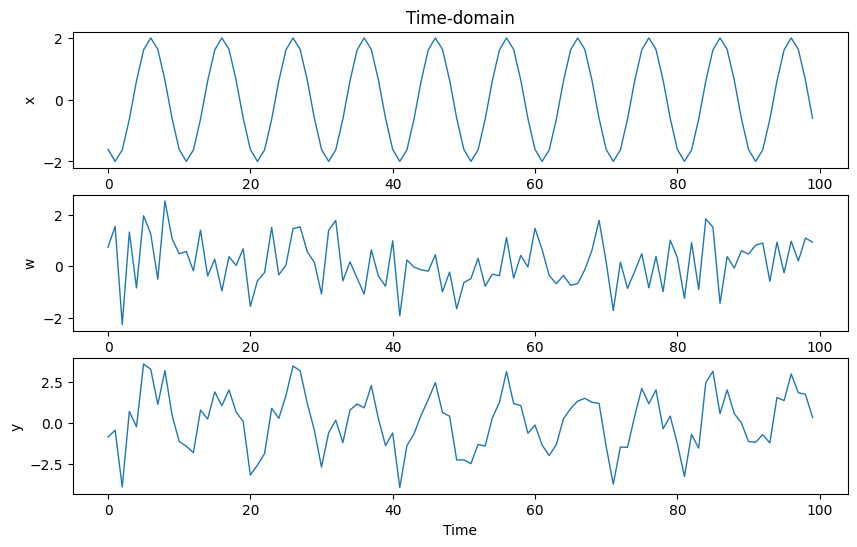

In [3]:
# Plot realisations
plt.figure()
plt.subplot(311)
plt.plot(x)
plt.title('Time-domain')
plt.ylabel('x')
plt.subplot(312)
plt.plot(w)
plt.ylabel('w')
plt.subplot(313)
plt.plot(y)
plt.ylabel('y')
plt.xlabel('Time')
plt.show()

### Estimate ACF. Notice the periodicity as compared to the realisation.

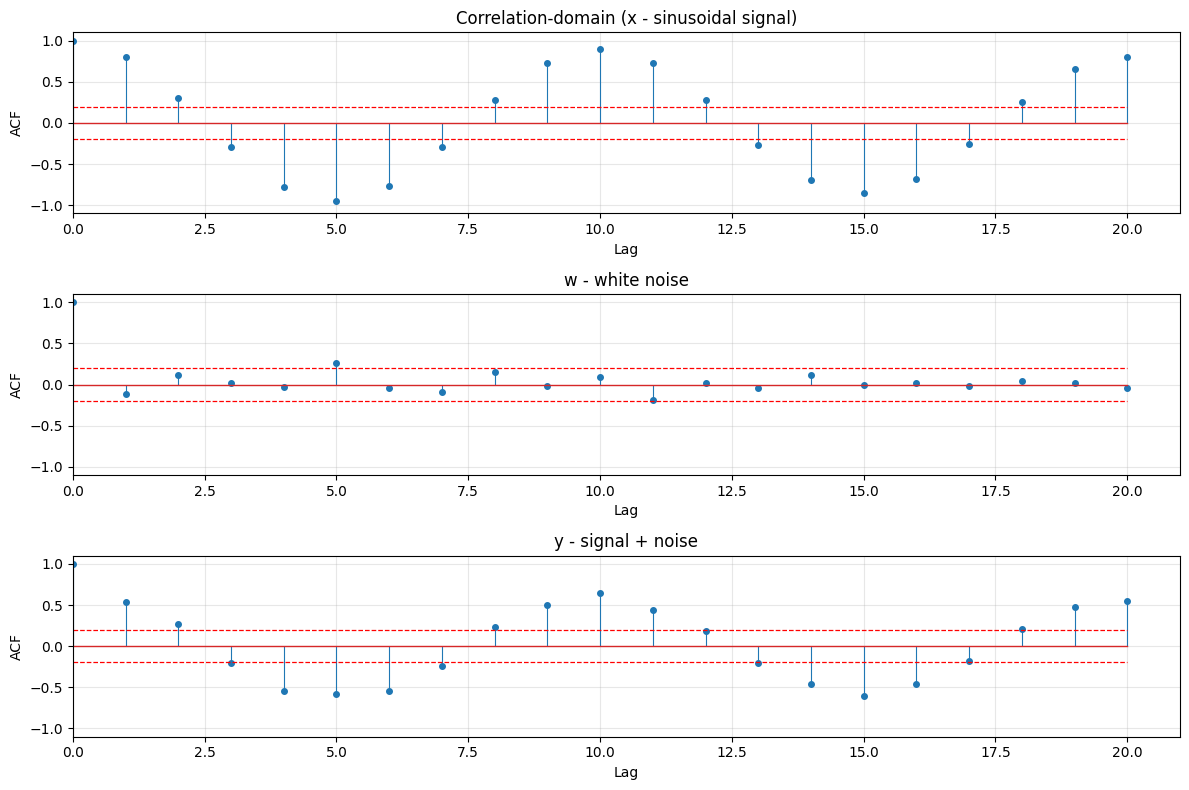

In [4]:
nLags = 20
alpha = 0.05  # Confidence level

plt.figure(figsize=(12, 8))

# ACF for x (sinusoidal signal)
plt.subplot(311)
acf_x = acf(x, nLags, signLvl=alpha, plotIt=1, includeZeroLag=1)
plt.title('Correlation-domain (x - sinusoidal signal)')
plt.ylabel('ACF')
plt.grid(True, alpha=0.3)

# ACF for w (white noise)
plt.subplot(312)
acf_w = acf(w, nLags, signLvl=alpha, plotIt=1, includeZeroLag=1)
plt.title('w - white noise')
plt.ylabel('ACF')
plt.grid(True, alpha=0.3)

# ACF for y (signal + noise)
plt.subplot(313)
acf_y = acf(y, nLags, signLvl=alpha, plotIt=1, includeZeroLag=1)
plt.title('y - signal + noise')
plt.ylabel('ACF')
plt.xlabel('Lag')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Lets estimate the power spectral density.

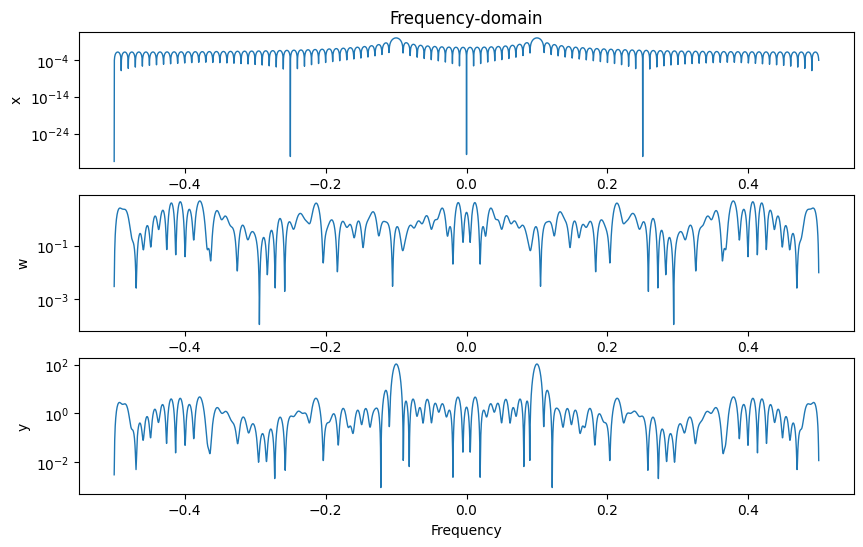

In [5]:
Padd = 1024*4  # 100                             # Try increasing the zero-padding to 1024.

X = fftshift( np.abs( fft(x, Padd) )**2 / N )
W = fftshift( np.abs( fft(w, Padd) )**2 / N )
Y = fftshift( np.abs( fft(y, Padd) )**2 / N )

ff = np.arange(Padd)/Padd - 0.5
plt.figure()
plt.subplot(311)
plt.semilogy(ff, X)
plt.title('Frequency-domain')
plt.ylabel('x')
plt.subplot(312)
plt.semilogy(ff, W)                             # Theoretically, this spectrum should be flat... 
plt.ylabel('w')
plt.subplot(313)
plt.semilogy(ff, Y)
plt.ylabel('y')
plt.xlabel('Frequency')
plt.show()

## What about windowing? 
Notice the loss of power, the increasing with the mainlobe, as well as the weaker sidelobes when using the windowing.

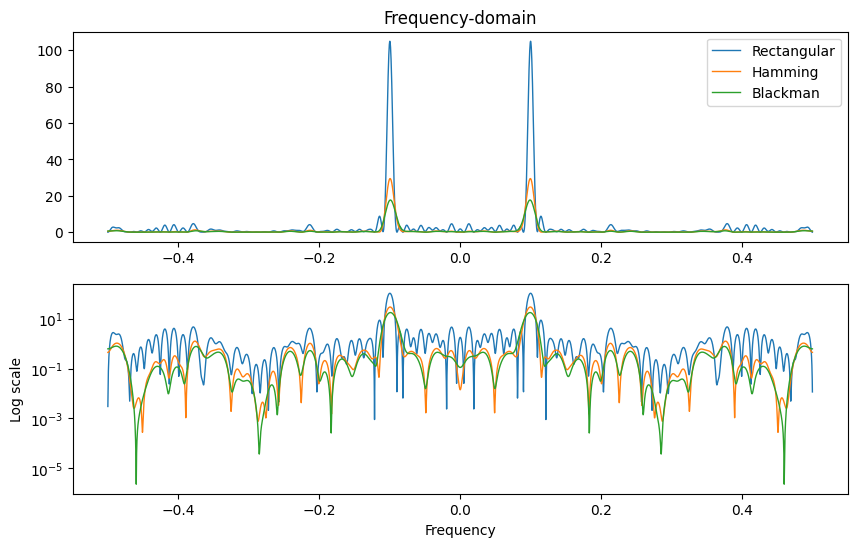

In [6]:
Y2 = fftshift( np.abs( fft(y*hamming(N), Padd) )**2 / N )
Y3 = fftshift( np.abs( fft(y*blackman(N), Padd) )**2 / N )

plt.figure()
plt.subplot(211)
plt.plot( ff, np.column_stack([Y, Y2, Y3]) )                
plt.title('Frequency-domain')
plt.legend(['Rectangular','Hamming','Blackman'])
plt.subplot(212)
plt.semilogy( ff, np.column_stack([Y, Y2, Y3]) )
plt.ylabel('Log scale')
plt.xlabel('Frequency')
#plt.axis([-.5, .5, .1, max(Y)])               # What does this command do?
plt.show()

## Lets try do this over and over...
Notice how the variance increases proportionally to the true spectrum.
This is obviously not good. Windowing reduce the sidelobes, but at the
price of resolution and loss of power - but it does not reduce the
variance.

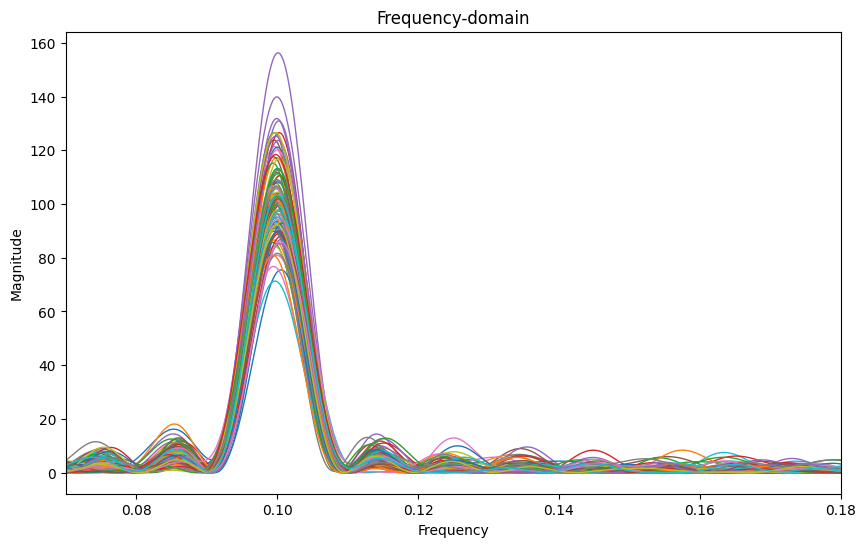

In [7]:
plt.figure()
for k in range(100):
    w  = np.random.randn(N)
    y  = x + w
    Y = fftshift( np.abs( fft(y, Padd) )**2 / N )
    plt.plot(ff, Y)

plt.title('Frequency-domain')
plt.ylabel('Magnitude')
plt.xlabel('Frequency')
plt.xlim([0.07, 0.18])                          # What does this command do?
plt.show()

### Using windowing

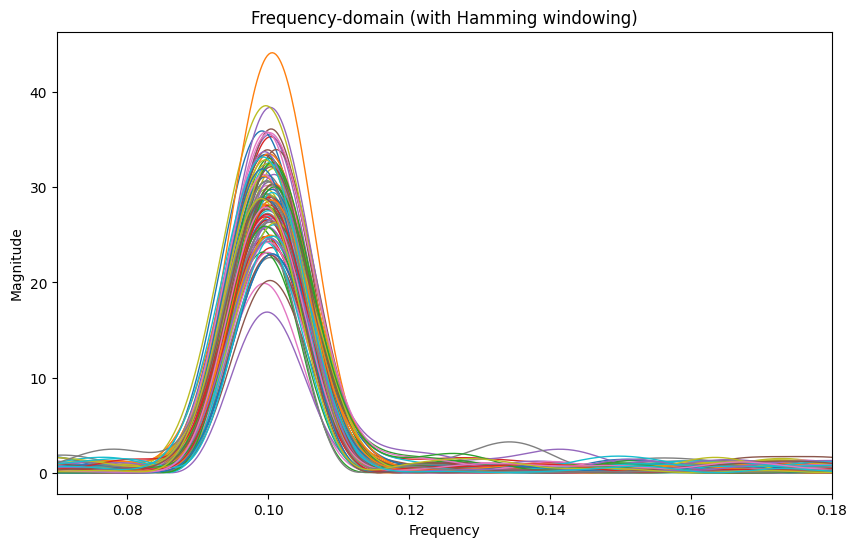

In [8]:
# Try using Hamming windowing instead of rectangular
plt.figure()
for k in range(100):
    w  = np.random.randn(N)
    y  = x + w
    Y = fftshift( np.abs( fft(y*hamming(N), Padd) )**2 / N )     # Using Hamming window
    plt.plot(ff, Y)

plt.title('Frequency-domain (with Hamming windowing)')
plt.ylabel('Magnitude')
plt.xlabel('Frequency')
plt.xlim([0.07, 0.18])
plt.show()

###  Using Yule-Walker estimate

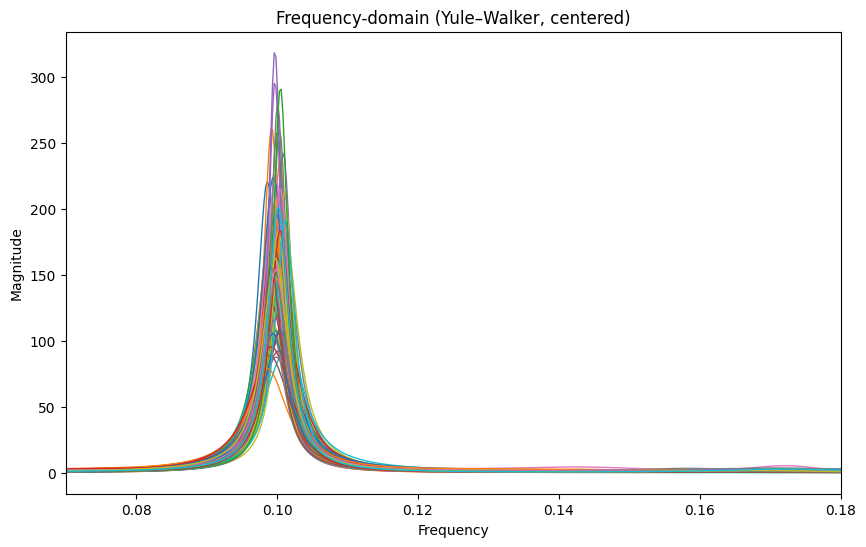

In [9]:
# Try using the Yule-Walker estimate.
plt.figure()
for k in range(100):
    w = np.random.randn(N)  
    y = x + w               
    Pxx, f = pyulear(y, order=20, nfft=Padd, option="centered", fs=1.0)
    plt.plot(f, Pxx)

plt.title('Frequency-domain (Yule–Walker, centered)')
plt.ylabel('Magnitude') 
plt.xlabel('Frequency')
plt.xlim([0.07, 0.18])  # same focus region as your example
plt.show()